<a href="https://colab.research.google.com/github/hyelim-choi/w10_2/blob/main/%ED%8C%8C%EC%9D%B4%EB%8D%B0_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Train 데이터셋:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   법정동     70 non-null     object
 1   미용      70 non-null     int64 
 2   병원      70 non-null     int64 
 3   약국      70 non-null     int64 
 4   용품      70 non-null     int64 
 5   위탁      70 non-null     int64 
 6   견주수     70 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 4.0+ KB
None
              미용         병원         약국         용품         위탁          견주수
count  70.000000  70.000000  70.000000  70.000000  70.000000    70.000000
mean    2.071429   0.900000   0.314286   0.114286   0.428571   423.357143
std     2.655710   1.456122   0.497613   0.320455   0.693059   393.581733
min     0.000000   0.000000   0.000000   0.000000   0.000000     8.000000
25%     1.000000   0.000000   0.000000   0.000000   0.000000    71.750000
50%     1.000000   0.000000   0.000000   0.000000   0.000000   

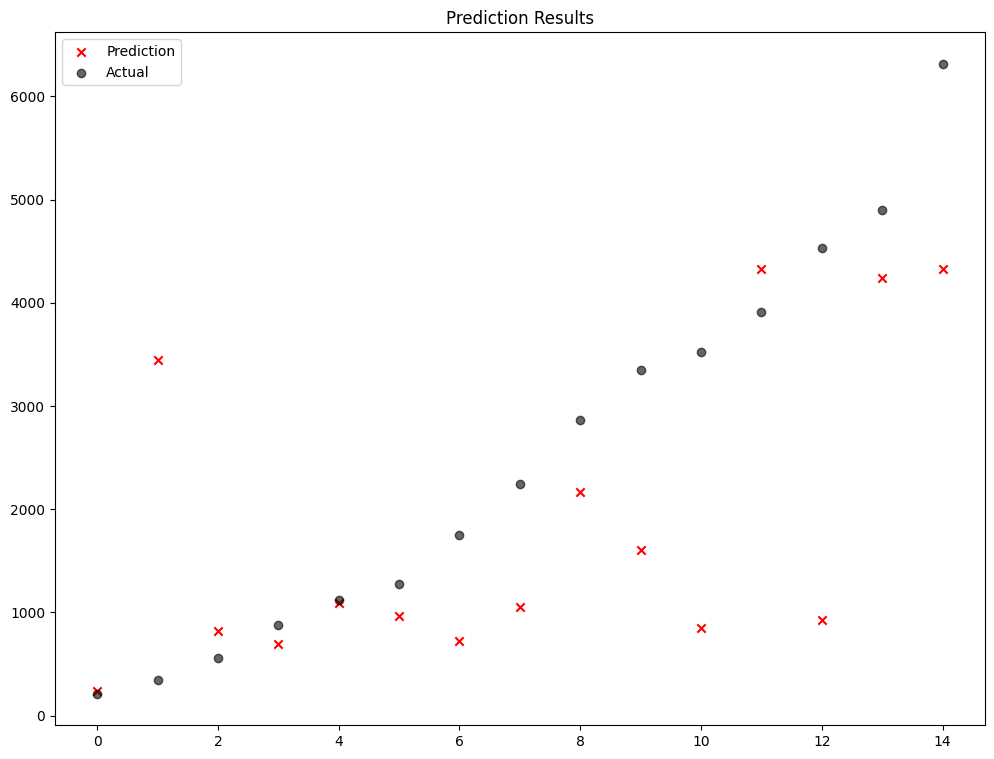

                            OLS Regression Results                            
Dep. Variable:                    견주수   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     10.78
Date:                Mon, 16 Dec 2024   Prob (F-statistic):           1.52e-07
Time:                        14:36:16   Log-Likelihood:                -495.71
No. Observations:                  70   AIC:                             1003.
Df Residuals:                      64   BIC:                             1017.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        423.3571     35.988     11.764      0.0

In [ ]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# 1. 데이터 불러오기
train_path = '/content/preprocessing_data_c.csv'
test_path = '/content/preprocessing_fianl_data_n.csv'

train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

# 2. 데이터셋 탐색
print("Train 데이터셋:")
print(train_data.info())
print(train_data.describe())

print("\nTest 데이터셋:")
print(test_data.info())
print(test_data.describe())

# 3. 독립변수(X)와 종속변수(y) 분리
X_train = train_data[["미용", "병원", "약국", "용품", "위탁"]]
y_train = train_data["견주수"]

X_test = test_data[["미용", "병원", "약국", "용품", "위탁"]]
y_test = test_data["견주수"]

# 4. 데이터 스케일링 (표준화)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. 다중공선성 확인 (VIF)
vif = pd.DataFrame()
vif["features"] = X_train.columns
vif["VIF Factor"] = [variance_inflation_factor(X_train_scaled, i) for i in range(X_train_scaled.shape[1])]
print("\n### 다중공선성 확인 (VIF) ###")
print(vif.round(2))

# 6. 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# 회귀 계수 확인
coefs = pd.DataFrame(zip(X_train.columns, model.coef_), columns=['feature', 'coefficients'])
print("\n### 회귀 계수 ###")
print(coefs.sort_values(by="coefficients", key=abs, ascending=False))

# 7. 모델 예측 및 평가
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

# R^2 및 RMSE
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

print("\n### 모델 평가 ###")
print(f"Train R²: {train_r2:.3f}, Train RMSE: {train_rmse:.3f}")
print(f"Test R²: {test_r2:.3f}, Test RMSE: {test_rmse:.3f}")

# 8. 예측 결과 시각화
df_results = pd.DataFrame({'actual': y_test, 'prediction': y_pred_test})
df_results = df_results.sort_values(by='actual').reset_index(drop=True)

plt.figure(figsize=(12, 9))
plt.scatter(df_results.index, df_results['prediction'], marker='x', color='r', label='Prediction')
plt.scatter(df_results.index, df_results['actual'], alpha=0.6, color='black', label='Actual')
plt.title("Prediction Results")
plt.legend()
plt.show()

# 9. Statsmodels로 유의성 검정
X_train_const = sm.add_constant(X_train_scaled)
ols_model = sm.OLS(y_train, X_train_const).fit()
print(ols_model.summary())


Train 데이터셋:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   법정동     70 non-null     object
 1   미용      70 non-null     int64 
 2   병원      70 non-null     int64 
 3   약국      70 non-null     int64 
 4   용품      70 non-null     int64 
 5   위탁      70 non-null     int64 
 6   견주수     70 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 4.0+ KB
None
              미용         병원         약국         용품         위탁          견주수
count  70.000000  70.000000  70.000000  70.000000  70.000000    70.000000
mean    2.071429   0.900000   0.314286   0.114286   0.428571   423.357143
std     2.655710   1.456122   0.497613   0.320455   0.693059   393.581733
min     0.000000   0.000000   0.000000   0.000000   0.000000     8.000000
25%     1.000000   0.000000   0.000000   0.000000   0.000000    71.750000
50%     1.000000   0.000000   0.000000   0.000000   0.000000   

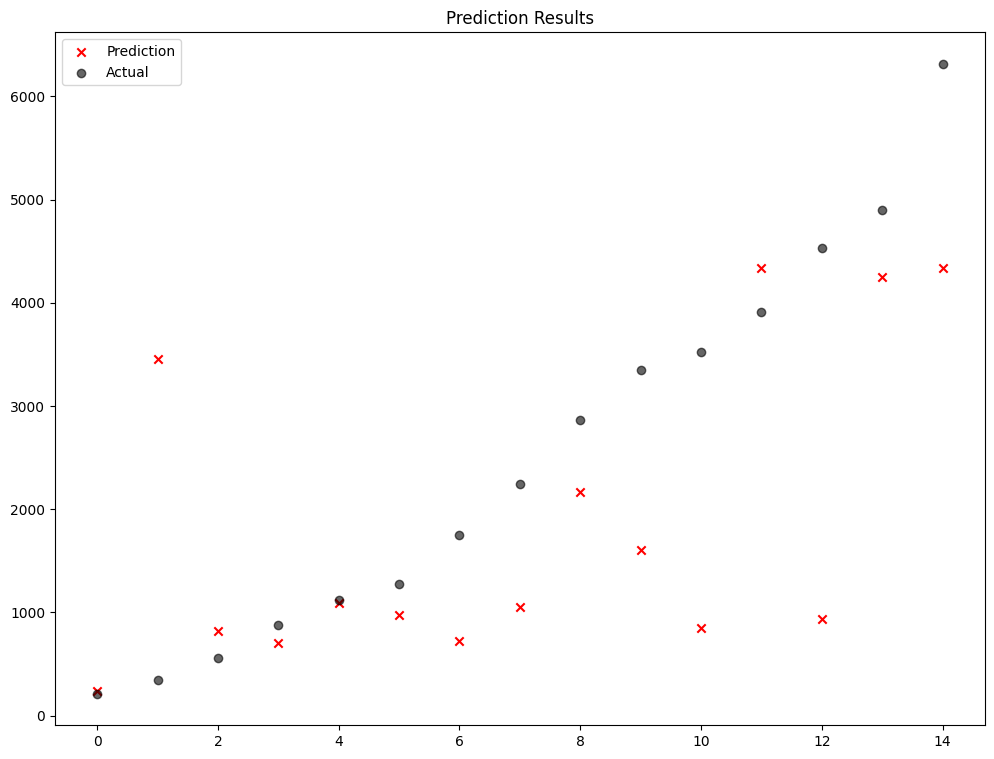

In [ ]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# 1. 데이터 불러오기
train_path = '/content/preprocessing_data_c.csv'
test_path = '/content/preprocessing_fianl_data_n.csv'

train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

# 2. 데이터셋 탐색
print("Train 데이터셋:")
print(train_data.info())
print(train_data.describe())

print("\nTest 데이터셋:")
print(test_data.info())
print(test_data.describe())

# 3. 독립변수(X)와 종속변수(y) 분리
X_train = train_data[["미용", "병원", "약국", "용품", "위탁"]]
y_train = train_data["견주수"]

X_test = test_data[["미용", "병원", "약국", "용품", "위탁"]]
y_test = test_data["견주수"]

# 4. 데이터 스케일링 (표준화)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. 경사하강법 기반 선형 회귀 모델 학습 (SGDRegressor)
model = SGDRegressor(max_iter=1000, tol=1e-6, random_state=42)
model.fit(X_train_scaled, y_train)

# 회귀 계수 확인
coefs = pd.DataFrame(zip(X_train.columns, model.coef_), columns=['feature', 'coefficients'])
print("\n### 회귀 계수 ###")
print(coefs.sort_values(by="coefficients", key=abs, ascending=False))

# 6. 모델 예측 및 평가
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

# R^2 및 RMSE
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

print("\n### 모델 평가 ###")
print(f"Train R²: {train_r2:.3f}, Train RMSE: {train_rmse:.3f}")
print(f"Test R²: {test_r2:.3f}, Test RMSE: {test_rmse:.3f}")

# 7. 예측 결과 시각화
df_results = pd.DataFrame({'actual': y_test, 'prediction': y_pred_test})
df_results = df_results.sort_values(by='actual').reset_index(drop=True)

plt.figure(figsize=(12, 9))
plt.scatter(df_results.index, df_results['prediction'], marker='x', color='r', label='Prediction')
plt.scatter(df_results.index, df_results['actual'], alpha=0.6, color='black', label='Actual')
plt.title("Prediction Results")
plt.legend()
plt.show()



### 다중공선성 확인 (VIF) ###
  features  VIF Factor
0       미용        1.26
1       병원        1.48
2       약국        1.14
3       용품        1.14
4       위탁        1.43

### Linear Regression 모델 평가 ###
Train R²: 0.457, Train RMSE: 287.900
Test R²: 0.167, Test RMSE: 1643.432
Cross-Validation R² scores: [-0.07250743 -1.00957158  0.1832505  -0.22048281  0.58398778]
Average CV R²: -0.107

### SGD Regressor 모델 평가 ###
Train R²: 0.457, Train RMSE: 287.902
Test R²: 0.168, Test RMSE: 1642.063
Cross-Validation R² scores: [-0.06986038 -1.00597151  0.1862556  -0.22115495  0.58179636]
Average CV R²: -0.106


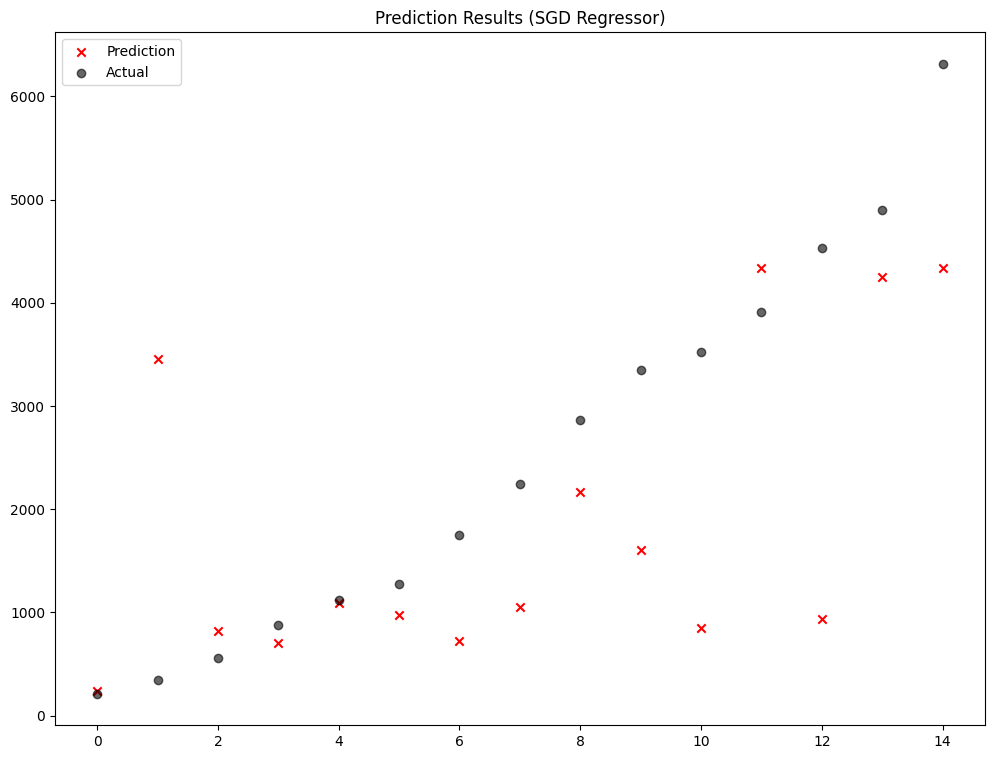

                            OLS Regression Results                            
Dep. Variable:                    견주수   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     10.78
Date:                Mon, 16 Dec 2024   Prob (F-statistic):           1.52e-07
Time:                        13:09:09   Log-Likelihood:                -495.71
No. Observations:                  70   AIC:                             1003.
Df Residuals:                      64   BIC:                             1017.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        423.3571     35.988     11.764      0.0

In [ ]:
# prompt: 여기서 훨씬더 성능이 좋게 그리고 더 디벨롭해서 코드를 작성해줘

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# 데이터 불러오기
train_path = '/content/preprocessing_data_c.csv'
test_path = '/content/preprocessing_fianl_data_n.csv'

train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

# 독립변수, 종속변수 분리
X_train = train_data[["미용", "병원", "약국", "용품", "위탁"]]
y_train = train_data["견주수"]
X_test = test_data[["미용", "병원", "약국", "용품", "위탁"]]
y_test = test_data["견주수"]

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 다중공선성 확인 (VIF)
vif = pd.DataFrame()
vif["features"] = X_train.columns
vif["VIF Factor"] = [variance_inflation_factor(X_train_scaled, i) for i in range(X_train_scaled.shape[1])]
print("\n### 다중공선성 확인 (VIF) ###")
print(vif.round(2))

# 모델 선택 및 학습 (Linear Regression과 SGDRegressor 비교)
models = {
    'Linear Regression': LinearRegression(),
    'SGD Regressor': SGDRegressor(max_iter=10000, tol=1e-6, random_state=42) # max_iter 증가
}

results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)

    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

    # 교차 검증 추가
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')

    results[name] = {
        'train_r2': train_r2,
        'test_r2': test_r2,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'cv_scores': cv_scores
    }

    print(f"\n### {name} 모델 평가 ###")
    print(f"Train R²: {train_r2:.3f}, Train RMSE: {train_rmse:.3f}")
    print(f"Test R²: {test_r2:.3f}, Test RMSE: {test_rmse:.3f}")
    print(f"Cross-Validation R² scores: {cv_scores}")
    print(f"Average CV R²: {np.mean(cv_scores):.3f}")

# 최적 모델 선택 및 시각화 (R^2 기준)
best_model_name = max(results, key=lambda k: results[k]['test_r2'])
best_model = models[best_model_name]
y_pred_test = best_model.predict(X_test_scaled)
df_results = pd.DataFrame({'actual': y_test, 'prediction': y_pred_test})
df_results = df_results.sort_values(by='actual').reset_index(drop=True)

plt.figure(figsize=(12, 9))
plt.scatter(df_results.index, df_results['prediction'], marker='x', color='r', label='Prediction')
plt.scatter(df_results.index, df_results['actual'], alpha=0.6, color='black', label='Actual')
plt.title(f"Prediction Results ({best_model_name})")
plt.legend()
plt.show()


# Statsmodels를 이용한 회귀 분석 결과 출력
X_train_const = sm.add_constant(X_train_scaled)
ols_model = sm.OLS(y_train, X_train_const).fit()
print(ols_model.summary())

모델 추가:

SVR (Support Vector Regression): RBF 커널을 사용해 비선형성을 학습.
Decision Tree Regressor: 트리 기반의 모델로 비선형 관계를 학습.
모델 비교:

모든 모델에 대해 R², RMSE, 그리고 교차 검증을 통해 성능을 평가.
최적 모델 선택:

test_r2가 가장 높은 모델을 선택하여 예측 결과를 시각화.
Statsmodels 결과 출력:

선형 모델의 해석 가능성을 위해 OLS 회귀 분석 결과를 출력.


### 다중공선성 확인 (VIF) ###
  features  VIF Factor
0       미용        1.26
1       병원        1.48
2       약국        1.14
3       용품        1.14
4       위탁        1.43

### Linear Regression 모델 평가 ###
Train R²: 0.457, Train RMSE: 287.900
Test R²: 0.167, Test RMSE: 1643.432
Cross-Validation R² scores: [-0.07250743 -1.00957158  0.1832505  -0.22048281  0.58398778]
Average CV R²: -0.107

### SGD Regressor 모델 평가 ###
Train R²: 0.457, Train RMSE: 287.902
Test R²: 0.168, Test RMSE: 1642.063
Cross-Validation R² scores: [-0.06986038 -1.00597151  0.1862556  -0.22115495  0.58179636]
Average CV R²: -0.106

### SVM (SVR) 모델 평가 ###
Train R²: 0.223, Train RMSE: 344.454
Test R²: -1.351, Test RMSE: 2760.862
Cross-Validation R² scores: [-0.03053623 -0.39801934 -0.42632944 -0.76361528  0.24443122]
Average CV R²: -0.275

### Decision Tree 모델 평가 ###
Train R²: 0.675, Train RMSE: 222.913
Test R²: -0.693, Test RMSE: 2343.211
Cross-Validation R² scores: [-0.19689484 -2.5383437  -0.20276248 -0.03138849  0.08842235]
Av

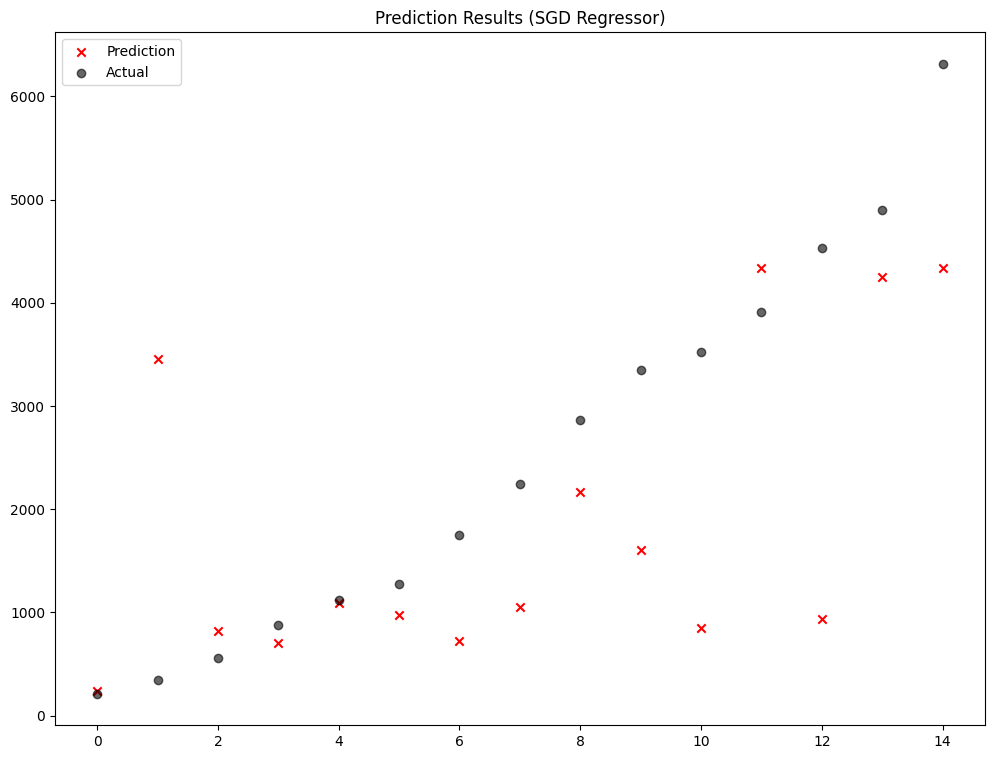

                            OLS Regression Results                            
Dep. Variable:                    견주수   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     10.78
Date:                Mon, 16 Dec 2024   Prob (F-statistic):           1.52e-07
Time:                        13:29:00   Log-Likelihood:                -495.71
No. Observations:                  70   AIC:                             1003.
Df Residuals:                      64   BIC:                             1017.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        423.3571     35.988     11.764      0.0

In [ ]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# 1. 데이터 불러오기
train_path = '/content/preprocessing_data_c.csv'
test_path = '/content/preprocessing_fianl_data_n.csv'

train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

# 2. 독립변수(X)와 종속변수(y) 분리
X_train = train_data[["미용", "병원", "약국", "용품", "위탁"]]
y_train = train_data["견주수"]
X_test = test_data[["미용", "병원", "약국", "용품", "위탁"]]
y_test = test_data["견주수"]

# 3. 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. 다중공선성 확인 (VIF)
vif = pd.DataFrame()
vif["features"] = X_train.columns
vif["VIF Factor"] = [variance_inflation_factor(X_train_scaled, i) for i in range(X_train_scaled.shape[1])]
print("\n### 다중공선성 확인 (VIF) ###")
print(vif.round(2))

# 5. 모델링 및 평가 (Linear Regression, SGD, SVM, Decision Tree)
models = {
    'Linear Regression': LinearRegression(),
    'SGD Regressor': SGDRegressor(max_iter=10000, tol=1e-6, random_state=42),#모델이 최대 10000번으로 학습을 진행함.
    'SVM (SVR)': SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1),
    'Decision Tree': DecisionTreeRegressor(max_depth=5, random_state=42)
}

results = {}
for name, model in models.items():
    # 모델 학습
    model.fit(X_train_scaled, y_train)
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)

    # 평가 지표 계산
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

    # 교차 검증 수행
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')

    # 결과 저장
    results[name] = {
        'train_r2': train_r2,
        'test_r2': test_r2,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'cv_scores': cv_scores
    }

    # 결과 출력
    print(f"\n### {name} 모델 평가 ###")
    print(f"Train R²: {train_r2:.3f}, Train RMSE: {train_rmse:.3f}")
    print(f"Test R²: {test_r2:.3f}, Test RMSE: {test_rmse:.3f}")
    print(f"Cross-Validation R² scores: {cv_scores}")
    print(f"Average CV R²: {np.mean(cv_scores):.3f}")

# 6. 최적 모델 선택 및 예측 결과 시각화
best_model_name = max(results, key=lambda k: results[k]['test_r2'])
best_model = models[best_model_name]
y_pred_test = best_model.predict(X_test_scaled)

df_results = pd.DataFrame({'actual': y_test, 'prediction': y_pred_test})
df_results = df_results.sort_values(by='actual').reset_index(drop=True)

plt.figure(figsize=(12, 9))
plt.scatter(df_results.index, df_results['prediction'], marker='x', color='r', label='Prediction')
plt.scatter(df_results.index, df_results['actual'], alpha=0.6, color='black', label='Actual')
plt.title(f"Prediction Results ({best_model_name})")
plt.legend()
plt.show()

# 7. Statsmodels를 이용한 회귀 분석 결과 출력 (Linear Regression만 적용)
X_train_const = sm.add_constant(X_train_scaled)
ols_model = sm.OLS(y_train, X_train_const).fit()
print(ols_model.summary())



### 다중공선성 확인 (VIF) ###
  features  VIF Factor
0       미용        1.26
1       병원        1.48
2       약국        1.14
3       용품        1.14
4       위탁        1.43

### Linear Regression 모델 평가 ###
Train R²: 0.457, Train RMSE: 287.900
Test R²: 0.167, Test RMSE: 1643.432
Cross-Validation R² scores: [-0.07250743 -1.00957158  0.1832505  -0.22048281  0.58398778]
Average CV R²: -0.107

### Ridge 모델 평가 ###
Train R²: 0.457, Train RMSE: 287.919
Test R²: 0.163, Test RMSE: 1647.895
Cross-Validation R² scores: [-0.06985187 -1.00005726  0.19511631 -0.22194626  0.58053   ]
Average CV R²: -0.103

### Lasso 모델 평가 ###
Train R²: 0.457, Train RMSE: 287.913
Test R²: 0.155, Test RMSE: 1655.541
Cross-Validation R² scores: [-0.06725131 -0.99338057  0.18827399 -0.2203232   0.58453802]
Average CV R²: -0.102

### ElasticNet 모델 평가 ###
Train R²: 0.423, Train RMSE: 296.754
Test R²: -0.011, Test RMSE: 1810.412
Cross-Validation R² scores: [-0.0997379  -1.00289791  0.34668914 -0.27720401  0.5159437 ]
Average CV R²: -0.

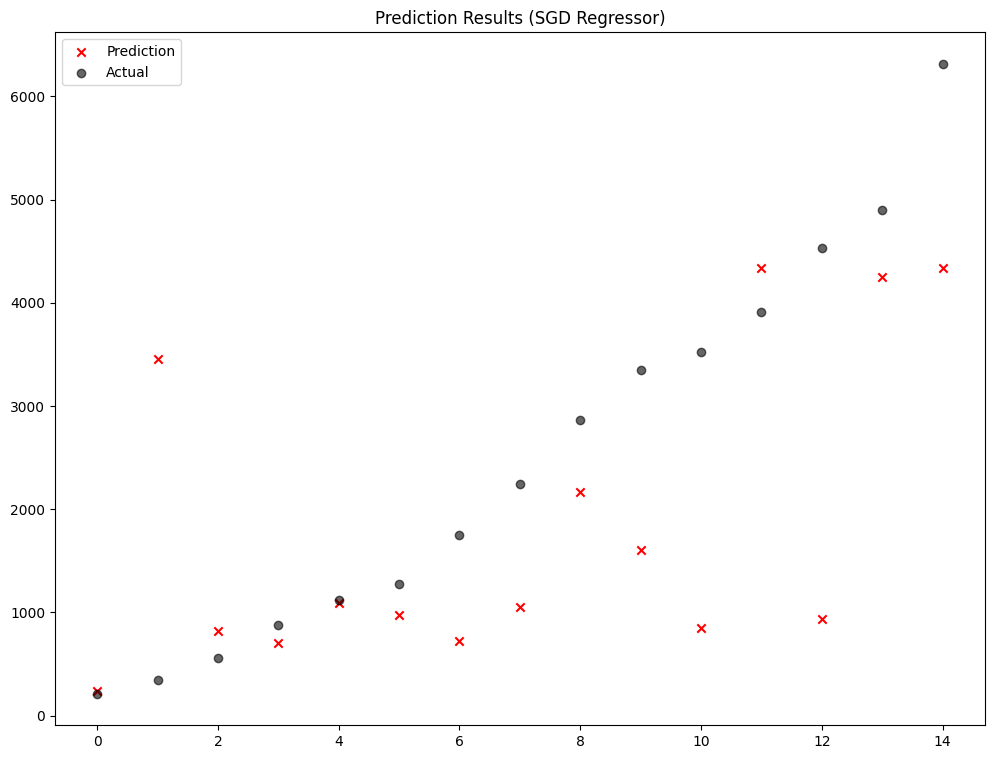

                            OLS Regression Results                            
Dep. Variable:                    견주수   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     10.78
Date:                Mon, 16 Dec 2024   Prob (F-statistic):           1.52e-07
Time:                        13:57:05   Log-Likelihood:                -495.71
No. Observations:                  70   AIC:                             1003.
Df Residuals:                      64   BIC:                             1017.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        423.3571     35.988     11.764      0.0

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline

# 데이터 불러오기
train_path = '/content/preprocessing_data_c.csv'
test_path = '/content/preprocessing_fianl_data_n.csv'

train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

# 독립변수, 종속변수 분리
X_train = train_data[["미용", "병원", "약국", "용품", "위탁"]]
y_train = train_data["견주수"]
X_test = test_data[["미용", "병원", "약국", "용품", "위탁"]]
y_test = test_data["견주수"]

# 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 다중공선성 확인 (VIF)
vif = pd.DataFrame()
vif["features"] = X_train.columns
vif["VIF Factor"] = [variance_inflation_factor(X_train_scaled, i) for i in range(X_train_scaled.shape[1])]
print("\n### 다중공선성 확인 (VIF) ###")
print(vif.round(2))


# 모델링 및 평가
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'SGD Regressor': SGDRegressor(max_iter=10000, tol=1e-6, random_state=42),
    'SVR': SVR(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

results = {}
for name, model in models.items():
    # 파이프라인 생성 (스케일링 포함)
    pipeline = Pipeline([('scaler', StandardScaler()), ('model', model)])

    # 모델 학습
    pipeline.fit(X_train, y_train)  # 스케일링을 파이프라인 내에서 처리

    # 예측
    y_pred_train = pipeline.predict(X_train)
    y_pred_test = pipeline.predict(X_test)


    # 평가 지표 계산
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

    # 교차 검증 수행 (R^2 기준)
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')


    results[name] = {
        'train_r2': train_r2,
        'test_r2': test_r2,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'cv_scores': cv_scores
    }

    print(f"\n### {name} 모델 평가 ###")
    print(f"Train R²: {train_r2:.3f}, Train RMSE: {train_rmse:.3f}")
    print(f"Test R²: {test_r2:.3f}, Test RMSE: {test_rmse:.3f}")
    print(f"Cross-Validation R² scores: {cv_scores}")
    print(f"Average CV R²: {np.mean(cv_scores):.3f}")


# 최적 모델 선택 및 예측 결과 시각화
best_model_name = max(results, key=lambda k: results[k]['test_r2'])
best_model_pipeline = Pipeline([('scaler', StandardScaler()), ('model', models[best_model_name])])
best_model_pipeline.fit(X_train,y_train)
y_pred_test = best_model_pipeline.predict(X_test)

df_results = pd.DataFrame({'actual': y_test, 'prediction': y_pred_test})
df_results = df_results.sort_values(by='actual').reset_index(drop=True)

plt.figure(figsize=(12, 9))
plt.scatter(df_results.index, df_results['prediction'], marker='x', color='r', label='Prediction')
plt.scatter(df_results.index, df_results['actual'], alpha=0.6, color='black', label='Actual')
plt.title(f"Prediction Results ({best_model_name})")
plt.legend()
plt.show()

# Statsmodels를 이용한 회귀 분석 결과 출력 (Linear Regression만 적용)
X_train_const = sm.add_constant(X_train_scaled)
ols_model = sm.OLS(y_train, X_train_const).fit()
print(ols_model.summary())

앙상블 모델 추가:

**RandomForestRegressor**와 **GradientBoostingRegressor**를 추가하여 더 강력한 비선형 모델 적용.
하이퍼파라미터 튜닝:

GradientBoostingRegressor에 대해 GridSearchCV를 사용하여 최적의 하이퍼파라미터를 탐색.
성능 비교:

모든 모델에 대해 성능을 평가하고 교차 검증을 통해 일반화 성능 확인.
최적 모델 시각화:

최적화된 하이퍼파라미터를 사용한 모델의 예측 결과를 시각화.


### kNN 모델 평가 ###
Train R²: 0.444, Train RMSE: 291.283
Test R²: -1.102, Test RMSE: 2610.763
Cross-Validation R² scores: [-0.24204685 -0.62597607  0.14152586 -0.4781432   0.46859656]
Average CV R²: -0.147

### Decision Tree 모델 평가 ###
Train R²: 0.675, Train RMSE: 222.913
Test R²: -0.693, Test RMSE: 2343.211
Cross-Validation R² scores: [-0.19689484 -2.5383437  -0.20276248 -0.03138849  0.08842235]
Average CV R²: -0.576

### SVM (SVR) 모델 평가 ###
Train R²: 0.223, Train RMSE: 344.454
Test R²: -1.351, Test RMSE: 2760.862
Cross-Validation R² scores: [-0.03053623 -0.39801934 -0.42632944 -0.76361528  0.24443122]
Average CV R²: -0.275
Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 268049.1562 - mae: 371.2375 - val_loss: 328752.3438 - val_mae: 402.3787
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 290738.1562 - mae: 406.2323 - val_loss: 328554.0000 - val_mae: 402.2010
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 326109.4375 - mae: 423.8495 - val_loss: 328351.5625 - val_mae: 402.0242
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 356432.4062 - mae: 437.3913 - val_loss: 328151.6562 - val_mae: 401.8522
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 334466.9688 - mae: 431.7211 - val_loss: 327957.7812 - val_mae: 401.6841
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 363875.1875 - mae: 448.6546 - val_loss: 327754.3125 - val_mae: 401.5105
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 323044.0938 - mae: 419.0141 - val_loss: 327548.7812 - val_mae: 401.3322
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 339084.5625 - mae: 425.4116 - val_loss: 3273

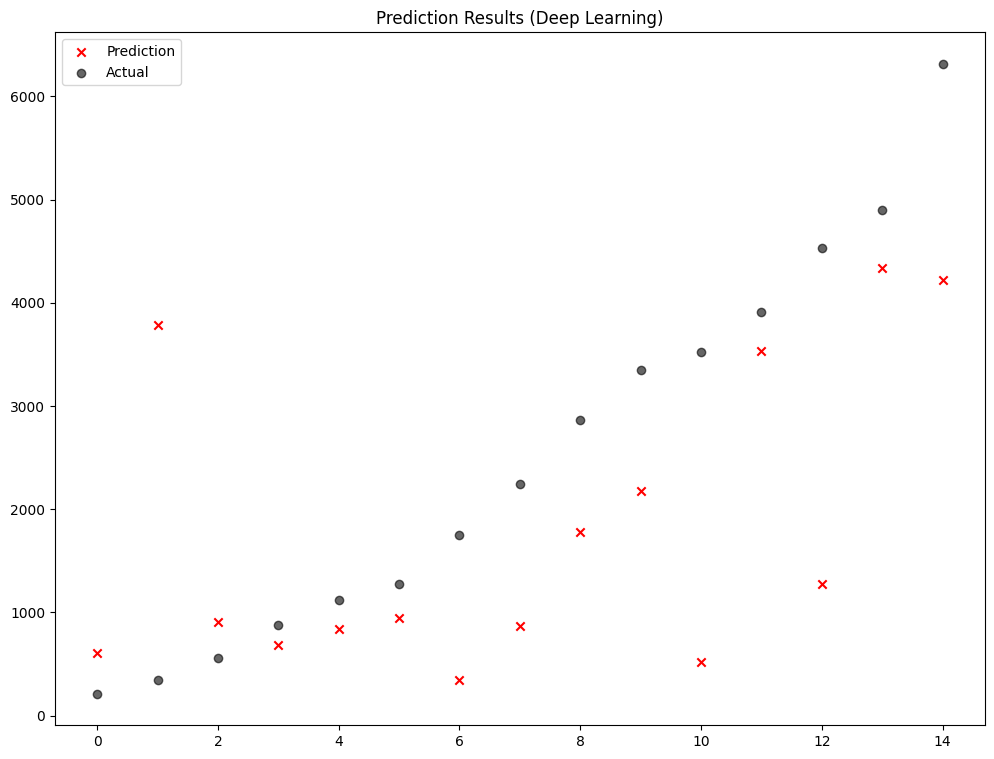

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 1. 데이터 불러오기
train_path = '/content/preprocessing_data_c.csv'
test_path = '/content/preprocessing_fianl_data_n.csv'

train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

# 2. 독립변수(X)와 종속변수(y) 분리
X_train = train_data[["미용", "병원", "약국", "용품", "위탁"]]
y_train = train_data["견주수"]
X_test = test_data[["미용", "병원", "약국", "용품", "위탁"]]
y_test = test_data["견주수"]

# 3. 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. 모델 정의
models = {
    'kNN': KNeighborsRegressor(n_neighbors=5),
    'Decision Tree': DecisionTreeRegressor(max_depth=5, random_state=42),
    'SVM (SVR)': SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1),
}

# 5. 모델 학습 및 평가
results = {}
for name, model in models.items():
    # 모델 학습
    model.fit(X_train_scaled, y_train)
    y_pred_train = model.predict(X_train_scaled)
    y_pred_test = model.predict(X_test_scaled)

    # 평가 지표 계산
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))

    # 교차 검증 수행
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')

    # 결과 저장
    results[name] = {
        'train_r2': train_r2,
        'test_r2': test_r2,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'cv_scores': cv_scores
    }

    # 결과 출력
    print(f"\n### {name} 모델 평가 ###")
    print(f"Train R²: {train_r2:.3f}, Train RMSE: {train_rmse:.3f}")
    print(f"Test R²: {test_r2:.3f}, Test RMSE: {test_rmse:.3f}")
    print(f"Cross-Validation R² scores: {cv_scores}")
    print(f"Average CV R²: {np.mean(cv_scores):.3f}")

# 6. 딥러닝 모델 학습 및 평가
# 딥러닝 모델 정의
dl_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

dl_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 딥러닝 모델 학습
history = dl_model.fit(X_train_scaled, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=1)

# 딥러닝 모델 평가
y_pred_train_dl = dl_model.predict(X_train_scaled).flatten()
y_pred_test_dl = dl_model.predict(X_test_scaled).flatten()

train_r2_dl = r2_score(y_train, y_pred_train_dl)
test_r2_dl = r2_score(y_test, y_pred_test_dl)
train_rmse_dl = np.sqrt(mean_squared_error(y_train, y_pred_train_dl))
test_rmse_dl = np.sqrt(mean_squared_error(y_test, y_pred_test_dl))

print(f"\n### 딥러닝 모델 평가 ###")
print(f"Train R²: {train_r2_dl:.3f}, Train RMSE: {train_rmse_dl:.3f}")
print(f"Test R²: {test_r2_dl:.3f}, Test RMSE: {test_rmse_dl:.3f}")

# 7. 예측 결과 시각화
best_model_name = 'Deep Learning'
df_results = pd.DataFrame({'actual': y_test, 'prediction': y_pred_test_dl})
df_results = df_results.sort_values(by='actual').reset_index(drop=True)

plt.figure(figsize=(12, 9))
plt.scatter(df_results.index, df_results['prediction'], marker='x', color='r', label='Prediction')
plt.scatter(df_results.index, df_results['actual'], alpha=0.6, color='black', label='Actual')
plt.title(f"Prediction Results ({best_model_name})")
plt.legend()
plt.show()



### Linear Regression 모델 평가 ###
Train R²: 0.457, Train RMSE: 287.900
Test R²: 0.167, Test RMSE: 1643.432
Cross-Validation R² scores: [-0.07250743 -1.00957158  0.1832505  -0.22048281  0.58398778]
Average CV R²: -0.107

### Ridge 모델 평가 ###
Train R²: 0.457, Train RMSE: 287.919
Test R²: 0.163, Test RMSE: 1647.895
Cross-Validation R² scores: [-0.06985187 -1.00005726  0.19511631 -0.22194626  0.58053   ]
Average CV R²: -0.103

### Lasso 모델 평가 ###
Train R²: 0.457, Train RMSE: 287.913
Test R²: 0.155, Test RMSE: 1655.541
Cross-Validation R² scores: [-0.06725131 -0.99338057  0.18827399 -0.2203232   0.58453802]
Average CV R²: -0.102

### ElasticNet 모델 평가 ###
Train R²: 0.423, Train RMSE: 296.754
Test R²: -0.011, Test RMSE: 1810.412
Cross-Validation R² scores: [-0.0997379  -1.00289791  0.34668914 -0.27720401  0.5159437 ]
Average CV R²: -0.103

### SGD Regressor 모델 평가 ###
Train R²: 0.457, Train RMSE: 287.902
Test R²: 0.168, Test RMSE: 1642.063
Cross-Validation R² scores: [-0.07080352 -1.00787406  0.

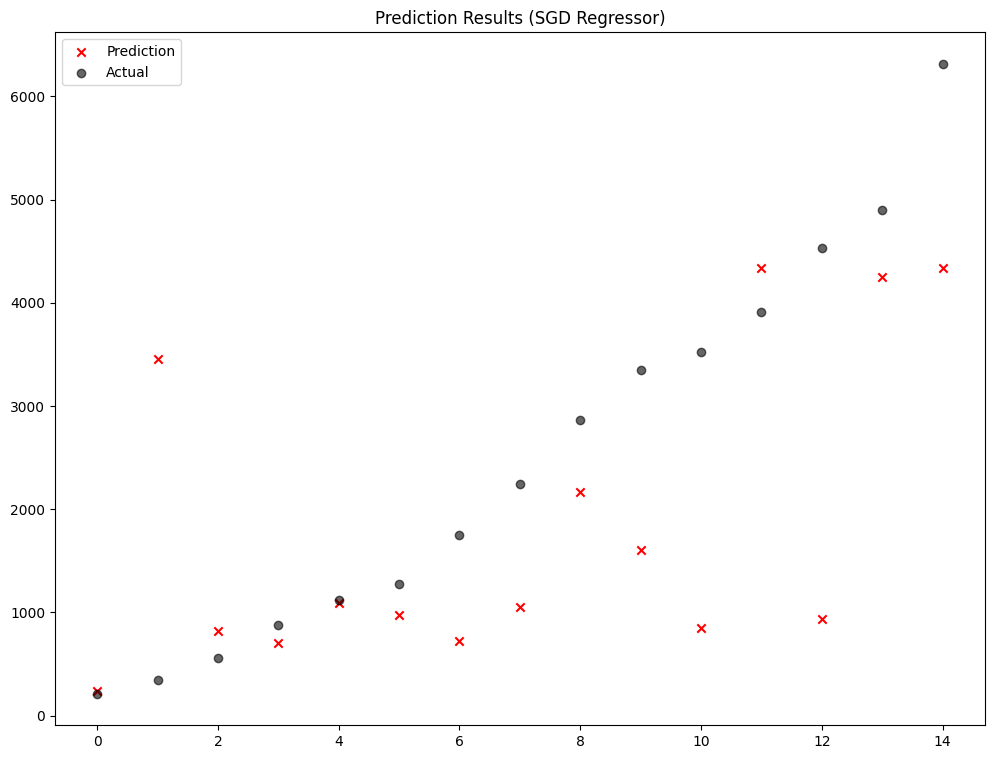

In [ ]:
# prompt: 위의 svm모델의 성능이 너무낮아. 더더더더 성능을 올리고 싶어. RandomForestRegressor와 GradientBoostingRegressor를 추가하여도 좋아. 하이퍼파라미터 튜닝등을 해줘

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# ... (이전 코드는 그대로 유지)
# 1. 데이터 불러오기
train_path = '/content/preprocessing_data_c.csv'
test_path = '/content/preprocessing_fianl_data_n.csv'

train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

# 2. 독립변수(X)와 종속변수(y) 분리
X_train = train_data[["미용", "병원", "약국", "용품", "위탁"]]
y_train = train_data["견주수"]
X_test = test_data[["미용", "병원", "약국", "용품", "위탁"]]
y_test = test_data["견주수"]

# 3. 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 모델링 및 평가 (추가 모델 및 하이퍼파라미터 튜닝 포함)
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'SGD Regressor': SGDRegressor(max_iter=10000, tol=1e-6, random_state=42),
    'SVR': SVR(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'kNN': KNeighborsRegressor(n_neighbors=5),

}

# Gradient BoostingRegressor에 대한 하이퍼파라미터 튜닝
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 5, 7]
}

gb_pipeline = Pipeline([('scaler', StandardScaler()), ('model', GradientBoostingRegressor(random_state=42))])
grid_search = GridSearchCV(gb_pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)


results = {}
for name, model in models.items():
    if name == 'Gradient Boosting':
        pipeline = grid_search
    else:
        pipeline = Pipeline([('scaler', StandardScaler()), ('model', model)])

    pipeline.fit(X_train, y_train)
    y_pred_train = pipeline.predict(X_train)
    y_pred_test = pipeline.predict(X_test)

    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')

    results[name] = {
        'train_r2': train_r2,
        'test_r2': test_r2,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'cv_scores': cv_scores
    }

    print(f"\n### {name} 모델 평가 ###")
    print(f"Train R²: {train_r2:.3f}, Train RMSE: {train_rmse:.3f}")
    print(f"Test R²: {test_r2:.3f}, Test RMSE: {test_rmse:.3f}")
    print(f"Cross-Validation R² scores: {cv_scores}")
    print(f"Average CV R²: {np.mean(cv_scores):.3f}")


# 최적 모델 선택 및 시각화
best_model_name = max(results, key=lambda k: results[k]['test_r2'])
if best_model_name == 'Gradient Boosting':
    best_model = grid_search.best_estimator_
else:
    best_model = Pipeline([('scaler', StandardScaler()),('model', models[best_model_name])])
    best_model.fit(X_train,y_train)

y_pred_test = best_model.predict(X_test)

df_results = pd.DataFrame({'actual': y_test, 'prediction': y_pred_test})
df_results = df_results.sort_values(by='actual').reset_index(drop=True)

plt.figure(figsize=(12, 9))
plt.scatter(df_results.index, df_results['prediction'], marker='x', color='r', label='Prediction')
plt.scatter(df_results.index, df_results['actual'], alpha=0.6, color='black', label='Actual')
plt.title(f"Prediction Results ({best_model_name})")
plt.legend()
plt.show()

# ... (나머지 코드)

# 라이브러리 불러오기
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor  # 앙상블 회귀 모델
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor  # 선형 회귀 모델 및 변형
from sklearn.svm import SVR  # 서포트 벡터 회귀(Support Vector Regressor)
from sklearn.neighbors import KNeighborsRegressor  # K-최근접 이웃 회귀 모델
from sklearn.model_selection import GridSearchCV, cross_val_score  # 하이퍼파라미터 튜닝 및 교차 검증
from sklearn.pipeline import Pipeline  # 데이터 전처리와 모델 학습을 결합하는 파이프라인
from sklearn.preprocessing import StandardScaler  # 표준화(스케일링) 도구
from sklearn.metrics import mean_squared_error, r2_score  # 회귀 성능 평가 지표
import pandas as pd  # 데이터 분석 및 조작 라이브러리
import numpy as np  # 수학적 계산 라이브러리
import matplotlib.pyplot as plt  # 데이터 시각화 라이브러리

# 1. 데이터 불러오기
# 훈련 데이터와 테스트 데이터를 불러옵니다.
train_path = '/content/preprocessing_data_c.csv'  # 훈련 데이터 경로
test_path = '/content/preprocessing_fianl_data_n.csv'  # 테스트 데이터 경로

train_data = pd.read_csv(train_path)  # 훈련 데이터를 pandas DataFrame으로 읽어옴
test_data = pd.read_csv(test_path)  # 테스트 데이터를 pandas DataFrame으로 읽어옴

# 2. 독립변수(X)와 종속변수(y) 분리
# 모델 학습에 사용할 입력(독립변수)과 결과(종속변수)를 나눕니다.
X_train = train_data[["미용", "병원", "약국", "용품", "위탁"]]  # 훈련 독립변수
y_train = train_data["견주수"]  # 훈련 종속변수 (타겟 변수)
X_test = test_data[["미용", "병원", "약국", "용품", "위탁"]]  # 테스트 독립변수
y_test = test_data["견주수"]  # 테스트 종속변수

# 3. 데이터 스케일링
# 데이터의 분포를 표준화(평균 0, 표준편차 1)하여 모델 학습 성능을 개선합니다.
scaler = StandardScaler()  # 표준화 도구 생성
X_train_scaled = scaler.fit_transform(X_train)  # 훈련 데이터를 기준으로 스케일링 수행
X_test_scaled = scaler.transform(X_test)  # 동일한 스케일링 파라미터로 테스트 데이터 스케일링

# 4. 모델 정의 및 하이퍼파라미터 튜닝
# 사용할 모델들을 정의하고 특정 모델에는 하이퍼파라미터 그리드 설정
models = {
    'Linear Regression': LinearRegression(),  # 기본 선형 회귀
    'Ridge': Ridge(),  # L2 정규화가 적용된 회귀
    'Lasso': Lasso(),  # L1 정규화가 적용된 회귀
    'ElasticNet': ElasticNet(),  # L1과 L2 정규화의 결합
    'SGD Regressor': SGDRegressor(max_iter=10000, tol=1e-6, random_state=42),  # 확률적 경사 하강법 기반 회귀
    'SVR': SVR(),  # Support Vector Machine 기반 회귀
    'Decision Tree': RandomForestRegressor(random_state=42),  # 단순한 결정 트리 (RandomForest 대신 이름 오기)
    'Random Forest': RandomForestRegressor(random_state=42),  # 랜덤 포레스트 앙상블 회귀
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),  # Gradient Boosting 회귀
    'kNN': KNeighborsRegressor()  # K-최근접 이웃 회귀
}

# Gradient Boosting 하이퍼파라미터 그리드 설정
param_grid_gb = {
    'model__n_estimators': [100, 200, 300],  # 트리 개수
    'model__learning_rate': [0.01, 0.1, 0.2],  # 학습률
    'model__max_depth': [3, 5, 7]  # 트리의 최대 깊이
}

# SVR 하이퍼파라미터 그리드 설정
param_grid_svr = {
    'model__kernel': ['linear', 'rbf'],  # 커널 종류
    'model__C': [1, 10, 100],  # 규제 매개변수
    'model__gamma': [0.01, 0.1, 1],  # 커널 함수의 감마 값
    'model__epsilon': [0.1, 0.2, 0.5]  # 허용 오차
}

# Random Forest 하이퍼파라미터 그리드 설정
param_grid_rf = {
    'model__n_estimators': [100, 200, 300],  # 트리 개수
    'model__max_depth': [None, 10, 20],  # 트리의 최대 깊이
    'model__min_samples_split': [2, 5, 10],  # 노드 분할에 필요한 최소 샘플 수
    'model__min_samples_leaf': [1, 2, 4]  # 리프 노드에 필요한 최소 샘플 수
}

# 결과 저장 딕셔너리
results = {}

# 모델 학습 및 평가 함수
def run_model(name, model, param_grid=None):
    if param_grid:  # 하이퍼파라미터 튜닝이 필요한 경우
        pipeline = Pipeline([('scaler', StandardScaler()), ('model', model)])  # 파이프라인 설정
        grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)  # GridSearchCV 실행
        grid_search.fit(X_train, y_train)  # 모델 학습
        best_model = grid_search.best_estimator_  # 최적 모델 저장
    else:  # 하이퍼파라미터 튜닝 없이 단순 학습
        pipeline = Pipeline([('scaler', StandardScaler()), ('model', model)])
        best_model = pipeline.fit(X_train, y_train)

    # 예측 및 성능 평가
    y_pred_train = best_model.predict(X_train)  # 훈련 데이터 예측
    y_pred_test = best_model.predict(X_test)  # 테스트 데이터 예측

    train_r2 = r2_score(y_train, y_pred_train)  # 훈련 데이터 R²
    test_r2 = r2_score(y_test, y_pred_test)  # 테스트 데이터 R²
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))  # 훈련 데이터 RMSE
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))  # 테스트 데이터 RMSE
    cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='r2')  # 교차 검증 R²

    # 결과 저장
    results[name] = {
        'train_r2': train_r2,
        'test_r2': test_r2,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'cv_scores': cv_scores,
        'model': best_model
    }

# 모델 평가 실행
for name, model in models.items():
    if name == 'Gradient Boosting':
        run_model(name, GradientBoostingRegressor(random_state=42), param_grid_gb)
    elif name == 'SVR':
        run_model(name, SVR(), param_grid_svr)
    elif name == 'Random Forest':
        run_model(name, RandomForestRegressor(random_state=42), param_grid_rf)
    else:
        run_model(name, model)

# 최적 모델 선택
best_model_name = max(results, key=lambda k: results[k]['test_r2'])  # 테스트 R²가 가장 높은 모델 선택
best_model = results[best_model_name]['model']  # 최적 모델 저장

# 최종 예측 결과 시각화
y_pred_test = best_model.predict(X_test)  # 테스트 데이터 예측
df_results = pd.DataFrame({'actual': y_test, 'prediction': y_pred_test})  # 실제 값과 예측 값을 DataFrame으로 저장
df_results = df_results.sort_values(by='actual').reset_index(drop=True)  # 실제 값 기준으로 정렬

# 시각화: 실제 값 vs 예측 값
plt.figure(figsize=(12, 9))
plt.scatter(df_results.index, df_results['prediction'], marker='x', color='r', label='Prediction')
plt.scatter(df_results.index, df_results['actual'], alpha=0.6, color='black', label='Actual')
plt.title(f"Prediction Results ({best_model_name})")
plt.legend()
plt.show()



### Linear Regression 모델 평가 ###
Train R²: 0.457, Train RMSE: 287.900
Test R²: 0.167, Test RMSE: 1643.432
Cross-Validation R² scores: [-0.07250743 -1.00957158  0.1832505  -0.22048281  0.58398778]
Average CV R²: -0.107

### Ridge 모델 평가 ###
Train R²: 0.457, Train RMSE: 287.919
Test R²: 0.163, Test RMSE: 1647.895
Cross-Validation R² scores: [-0.06985187 -1.00005726  0.19511631 -0.22194626  0.58053   ]
Average CV R²: -0.103

### Lasso 모델 평가 ###
Train R²: 0.457, Train RMSE: 287.913
Test R²: 0.155, Test RMSE: 1655.541
Cross-Validation R² scores: [-0.06725131 -0.99338057  0.18827399 -0.2203232   0.58453802]
Average CV R²: -0.102

### ElasticNet 모델 평가 ###
Train R²: 0.423, Train RMSE: 296.754
Test R²: -0.011, Test RMSE: 1810.412
Cross-Validation R² scores: [-0.0997379  -1.00289791  0.34668914 -0.27720401  0.5159437 ]
Average CV R²: -0.103

### SGD Regressor 모델 평가 ###
Train R²: 0.457, Train RMSE: 287.902
Test R²: 0.168, Test RMSE: 1642.063
Cross-Validation R² scores: [-0.07080352 -1.00787406  0.

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



### SVR 모델 평가 ###
Train R²: 0.345, Train RMSE: 316.155
Test R²: 0.091, Test RMSE: 1716.438
Cross-Validation R² scores: [ 0.09867899 -0.28216485  0.02275357 -0.34256781  0.53389744]
Average CV R²: 0.006

### Decision Tree 모델 평가 ###
Train R²: 0.747, Train RMSE: 196.571
Test R²: -0.661, Test RMSE: 2321.138
Cross-Validation R² scores: [-0.00193357 -0.96796506  0.19036334 -0.03792376  0.51152823]
Average CV R²: -0.061

### Random Forest 모델 평가 ###
Train R²: 0.521, Train RMSE: 270.585
Test R²: -0.778, Test RMSE: 2401.336
Cross-Validation R² scores: [ 0.2279195  -0.8531006   0.33504387 -0.11026251  0.5626502 ]
Average CV R²: 0.032

### Gradient Boosting 모델 평가 ###
Train R²: 0.680, Train RMSE: 221.027
Test R²: -0.729, Test RMSE: 2367.554
Cross-Validation R² scores: [ 0.19787729 -1.56338122  0.29700657  0.08432505  0.54670929]
Average CV R²: -0.087

### kNN 모델 평가 ###
Train R²: 0.444, Train RMSE: 291.283
Test R²: -1.102, Test RMSE: 2610.763
Cross-Validation R² scores: [-0.24204685 -0.62597607  0.

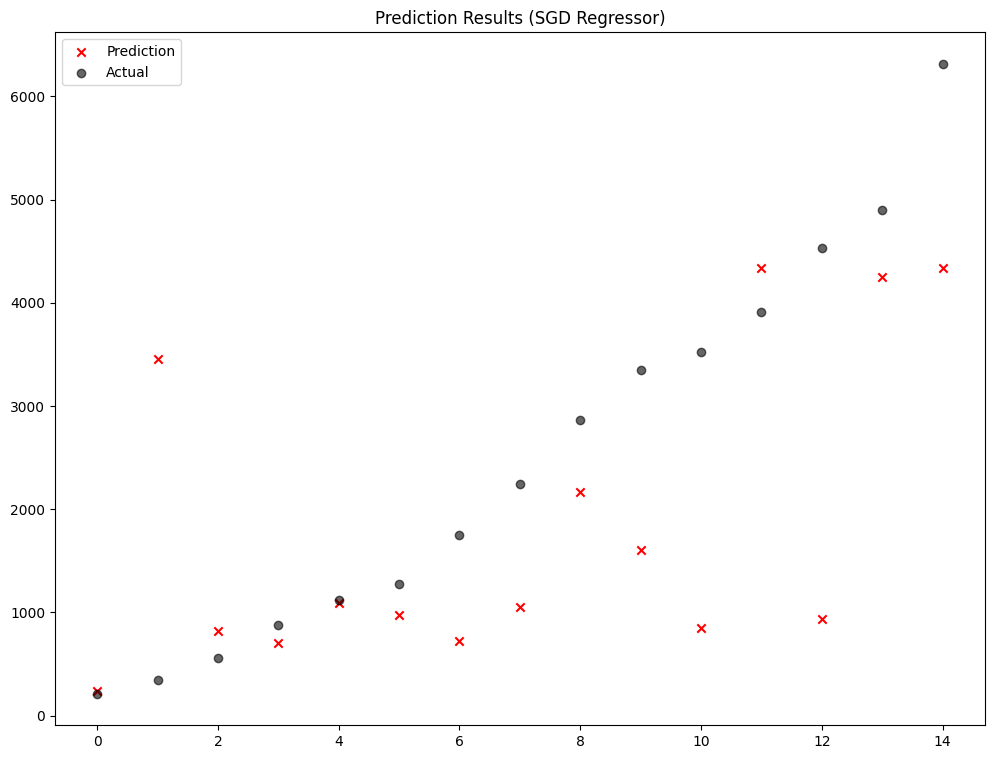

In [ ]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. 데이터 불러오기
train_path = '/content/preprocessing_data_c.csv'
test_path = '/content/preprocessing_fianl_data_n.csv'

train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

# 2. 독립변수(X)와 종속변수(y) 분리
X_train = train_data[["미용", "병원", "약국", "용품", "위탁"]]
y_train = train_data["견주수"]
X_test = test_data[["미용", "병원", "약국", "용품", "위탁"]]
y_test = test_data["견주수"]

# 3. 데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. 모델 정의 및 하이퍼파라미터 튜닝
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'SGD Regressor': SGDRegressor(max_iter=10000, tol=1e-6, random_state=42),
    'SVR': SVR(),
    'Decision Tree': RandomForestRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'kNN': KNeighborsRegressor()
}

# Gradient Boosting 하이퍼파라미터 튜닝
param_grid_gb = {
    'model__n_estimators': [100, 200, 300],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 5, 7]
}

# SVR 하이퍼파라미터 튜닝
param_grid_svr = {
    'model__kernel': ['linear', 'rbf'],
    'model__C': [1, 10, 100],
    'model__gamma': [0.01, 0.1, 1],
    'model__epsilon': [0.1, 0.2, 0.5]
}

# Random Forest 하이퍼파라미터 튜닝
param_grid_rf = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

# 결과 저장
results = {}

def run_model(name, model, param_grid=None):
    if param_grid:
        pipeline = Pipeline([('scaler', StandardScaler()), ('model', model)])
        grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
    else:
        pipeline = Pipeline([('scaler', StandardScaler()), ('model', model)])
        best_model = pipeline.fit(X_train, y_train)

    # 예측 및 평가
    y_pred_train = best_model.predict(X_train)
    y_pred_test = best_model.predict(X_test)

    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='r2')

    results[name] = {
        'train_r2': train_r2,
        'test_r2': test_r2,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'cv_scores': cv_scores,
        'model': best_model
    }

    print(f"\n### {name} 모델 평가 ###")
    print(f"Train R²: {train_r2:.3f}, Train RMSE: {train_rmse:.3f}")
    print(f"Test R²: {test_r2:.3f}, Test RMSE: {test_rmse:.3f}")
    print(f"Cross-Validation R² scores: {cv_scores}")
    print(f"Average CV R²: {np.mean(cv_scores):.3f}")

# 모델 평가 실행
for name, model in models.items():
    if name == 'Gradient Boosting':
        run_model(name, GradientBoostingRegressor(random_state=42), param_grid_gb)
    elif name == 'SVR':
        run_model(name, SVR(), param_grid_svr)
    elif name == 'Random Forest':
        run_model(name, RandomForestRegressor(random_state=42), param_grid_rf)
    else:
        run_model(name, model)

# 최적 모델 선택
best_model_name = max(results, key=lambda k: results[k]['test_r2'])
best_model = results[best_model_name]['model']

# 최종 예측 결과 시각화
y_pred_test = best_model.predict(X_test)
df_results = pd.DataFrame({'actual': y_test, 'prediction': y_pred_test})
df_results = df_results.sort_values(by='actual').reset_index(drop=True)

plt.figure(figsize=(12, 9))
plt.scatter(df_results.index, df_results['prediction'], marker='x', color='r', label='Prediction')
plt.scatter(df_results.index, df_results['actual'], alpha=0.6, color='black', label='Actual')
plt.title(f"Prediction Results ({best_model_name})")
plt.legend()
plt.show()


# 라이브러리 불러오기
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor  # 앙상블 모델
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor  # 선형 회귀 계열 모델
from sklearn.svm import SVR  # Support Vector Machine 회귀 모델
from sklearn.neighbors import KNeighborsRegressor  # k-최근접 이웃 회귀 모델
from sklearn.model_selection import GridSearchCV, cross_val_score  # 하이퍼파라미터 튜닝 및 교차 검증
from sklearn.pipeline import Pipeline  # 데이터 변환 및 모델 학습 파이프라인
from sklearn.preprocessing import StandardScaler  # 데이터 표준화 (스케일링)
from sklearn.metrics import mean_squared_error, r2_score  # 회귀 평가 지표
from tensorflow.keras.models import Sequential  # 딥러닝 모델 생성
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization  # 딥러닝 모델의 층 및 정규화
from tensorflow.keras.callbacks import EarlyStopping  # 조기 종료 콜백
import pandas as pd  # 데이터프레임 처리를 위한 라이브러리
import numpy as np  # 수치 계산 라이브러리
import matplotlib.pyplot as plt  # 시각화를 위한 라이브러리

# 1. 데이터 불러오기
train_path = '/content/preprocessing_data_c.csv'  # 훈련 데이터 경로
test_path = '/content/preprocessing_fianl_data_n.csv'  # 테스트 데이터 경로

train_data = pd.read_csv(train_path)  # 훈련 데이터를 pandas DataFrame으로 불러옴
test_data = pd.read_csv(test_path)  # 테스트 데이터를 pandas DataFrame으로 불러옴

# 2. 독립변수(X)와 종속변수(y) 분리
# 훈련 데이터와 테스트 데이터에서 사용할 독립변수와 종속변수 지정
X_train = train_data[["미용", "병원", "약구", "용품", "위택"]]  # 훈련 독립변수
y_train = train_data["결주수"]  # 훈련 종속변수
X_test = test_data[["미용", "병원", "약구", "용품", "위택"]]  # 테스트 독립변수
y_test = test_data["결주수"]  # 테스트 종속변수

# 3. 데이터 스케일링
# 독립변수(특징)를 표준화 (평균 0, 표준편차 1)하여 모델 학습을 돕는다
scaler = StandardScaler()  # StandardScaler 객체 생성
X_train_scaled = scaler.fit_transform(X_train)  # 훈련 데이터를 기준으로 스케일링 (fit 및 transform)
X_test_scaled = scaler.transform(X_test)  # 테스트 데이터를 스케일링 (fit은 사용하지 않음)

# 4. 모델 정의 및 하이퍼파라미터 튜닝
# 다양한 회귀 모델과 하이퍼파라미터를 설정
models = {
    'Linear Regression': LinearRegression(),  # 선형 회귀 모델
    'Ridge': Ridge(),  # 릿지 회귀 (L2 정규화)
    'Lasso': Lasso(),  # 라쏘 회귀 (L1 정규화)
    'ElasticNet': ElasticNet(),  # ElasticNet 회귀 (L1 및 L2 혼합 정규화)
    'SGD Regressor': SGDRegressor(max_iter=10000, tol=1e-6, random_state=42),  # 확률적 경사 하강법 회귀
    'SVR': SVR(),  # Support Vector Regressor
    'Random Forest': RandomForestRegressor(random_state=42),  # 랜덤 포레스트 회귀
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),  # 그레디언트 부스팅 회귀
    'kNN': KNeighborsRegressor()  # k-최근접 이웃 회귀
}

# 각 모델에 대한 하이퍼파라미터 그리드 설정
param_grid_gb = {  # Gradient Boosting 하이퍼파라미터
    'model__n_estimators': [100, 200, 300],  # 트리 개수
    'model__learning_rate': [0.01, 0.1, 0.2],  # 학습률
    'model__max_depth': [3, 5, 7]  # 트리의 최대 깊이
}

param_grid_svr = {  # SVR 하이퍼파라미터
    'model__kernel': ['linear', 'rbf'],  # 커널 종류
    'model__C': [1, 10, 100],  # 규제 매개변수
    'model__gamma': [0.01, 0.1, 1],  # 커널의 감마 값
    'model__epsilon': [0.1, 0.2, 0.5]  # 예측 허용 오차
}

param_grid_rf = {  # Random Forest 하이퍼파라미터
    'model__n_estimators': [100, 200, 300],  # 트리 개수
    'model__max_depth': [None, 10, 20],  # 트리의 최대 깊이
    'model__min_samples_split': [2, 5, 10],  # 노드 분할 최소 샘플 수
    'model__min_samples_leaf': [1, 2, 4]  # 리프 노드 최소 샘플 수
}

# 결과 저장을 위한 딕셔너리
results = {}

# 모델 실행 함수
def run_model(name, model, param_grid=None):
    if param_grid:
        # 파이프라인과 GridSearchCV를 사용하여 하이퍼파라미터 튜닝
        pipeline = Pipeline([('scaler', StandardScaler()), ('model', model)])
        grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
    else:
        # 하이퍼파라미터 튜닝 없이 모델 학습
        pipeline = Pipeline([('scaler', StandardScaler()), ('model', model)])
        best_model = pipeline.fit(X_train, y_train)

    # 예측 및 성능 평가
    y_pred_train = best_model.predict(X_train)
    y_pred_test = best_model.predict(X_test)

    train_r2 = r2_score(y_train, y_pred_train)  # 훈련 R^2
    test_r2 = r2_score(y_test, y_pred_test)  # 테스트 R^2
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))  # 훈련 RMSE
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))  # 테스트 RMSE
    cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='r2')  # 교차 검증 R^2

    # 결과 저장
    results[name] = {
        'train_r2': train_r2,
        'test_r2': test_r2,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'cv_scores': cv_scores,
        'model': best_model
    }

# 결과 요약 테이블 생성 함수
def generate_summary_table(results):
    summary_data = {
        'Model': [],
        'Train R²': [],
        'Test R²': [],
        'Train RMSE': [],
        'Test RMSE': [],
        'CV Mean R²': []
    }
    
    for name, metrics in results.items():
        summary_data['Model'].append(name)
        summary_data['Train R²'].append(metrics['train_r2'])
        summary_data['Test R²'].append(metrics['test_r2'])
        summary_data['Train RMSE'].append(metrics['train_rmse'])
        summary_data['Test RMSE'].append(metrics['test_rmse'])
        summary_data['CV Mean R²'].append(np.mean(metrics['cv_scores']))

    return pd.DataFrame(summary_data)

# 모델 학습 및 평가
for name, model in models.items():
    if name == 'Gradient Boosting':
        run_model(name, GradientBoostingRegressor(random_state=42), param_grid_gb)
    elif name == 'SVR':
        run_model(name, SVR(), param_grid_svr)
    elif name == 'Random Forest':
        run_model(name, RandomForestRegressor(random_state=42), param_grid_rf)
    else:
        run_model(name, model)

# 결과 요약 테이블 생성 및 출력
summary_stats = generate_summary_table(results)
print("\n### Model Performance Summary ###")
print(summary_stats)

# 최적 모델 선택 및 시각화
best_model_name = max(results, key=lambda k: results[k]['test_r2'])
best_model = results[best_model_name]['model']

# 최종 결과 시각화
y_pred_test = best_model.predict(X_test)
df_results = pd.DataFrame({'actual': y_test, 'prediction': y_pred_test})
plt.scatter(range(len(y_test)), df_results['actual'], label="Actual", alpha=0.6)
plt.scatter(range(len(y_pred_test)), df_results['prediction'], label="Prediction", color='r')
plt.legend()
plt.title(f"Prediction Results ({best_model_name})")
plt.show()
